In [ ]:
import nest_asyncio
import pandas as pd
nest_asyncio.apply()
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
import nltk
import nltk.stem as stemmer
from nltk import tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
import regex as re
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
import os
os.chdir('/content/drive/My Drive/bertModel/')

Mounted at /content/drive/


In [ ]:
df=pd.read_csv('NER.csv')
df

,Review,Rating
0,highlevel introduction new insights data analy...,0
1,diplomacy talking <NORP> talking nothing talki...,0
2,insufficient explanation bad lab experience fi...,0
3,poor explns little assignments give connectio...,0
4,assignments could little well suited people va...,0
...,...,...
2501,class great comprehensive <DATE> everything se...,1
2502,helps lot knowing peoples management thought h...,1
2503,couse interesting unfortunately cant pass due ...,1
2504,outdated tool technology intermediate student ...,1


In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in punctuation])
    return s

In [ ]:
df['Review'] = df['Review'].apply(remove_punctuation)
df

,Review,Rating
0,The lectures werent always easy to follow but ...,1
1,It is truly a gem of a course Thomas Ramsay ta...,1
2,week 2 and week3 are disorganized the example...,1
3,Although the course offers a very wide range o...,1
4,Had to rate this lower due to problem with the...,1
...,...,...
2082,Excellent I really learned a lot of the Financ...,0
2083,Best course to choose if you want to strengthe...,0
2084,very good course and increase knowledge in fin...,0
2085,Robert Shiller is the best professor I ever me...,0


In [ ]:
df['Review']= df['Review'].str.lower()
df

,Review,Rating
0,the lectures werent always easy to follow but ...,1
1,it is truly a gem of a course thomas ramsay ta...,1
2,week 2 and week3 are disorganized the example...,1
3,although the course offers a very wide range o...,1
4,had to rate this lower due to problem with the...,1
...,...,...
2082,excellent i really learned a lot of the financ...,0
2083,best course to choose if you want to strengthe...,0
2084,very good course and increase knowledge in fin...,0
2085,robert shiller is the best professor i ever me...,0


In [ ]:
def word_replace(txt):
    txt = re.sub(r'python', "", txt)
    txt = re.sub(r'ai', "", txt)
    txt = re.sub(r'networks', "", txt)
    txt = re.sub(r'psychology', "", txt)
    txt = re.sub(r'course', "", txt)
    txt = re.sub(r'lecture', "", txt)
    return txt

In [ ]:
words = set(nltk.corpus.words.words())
def remove_non_english(txt):
  txt=" ".join(w for w in nltk.wordpunct_tokenize(txt) if w.lower() in words or not w.isalpha())
  return txt

In [ ]:
df['Review'] = df['Review'].apply(lambda x: word_replace(x))
df['Review'] = df['Review'].apply(lambda x: remove_non_english(x))
df

,Review,Rating
0,the s werent always easy to follow but the wer...,1
1,it is truly a gem of a a beautiful approach in...,1
2,week 2 and week3 are the dont run without maki...,1
3,although the a very wide range of and also add...,1
4,had to rate this lower due to problem with the...,1
...,...,...
2082,excellent i really learned a lot of the financial,0
2083,best to choose if you want to strengthen your,0
2084,very good and increase knowledge in financial ...,0
2085,is the best professor i ever met in my life,0


In [ ]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(example_sent):
  word_tokens = word_tokenize(example_sent) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  s = " "
  s = s.join(filtered_sentence)
  return s

In [ ]:
df['Review']=df['Review'].apply(lambda x: remove_stopwords(x))
df

,Review,Rating
0,werent always easy follow really useful meant ...,1
1,truly gem beautiful approach teaching consumer...,1
2,week 2 week3 dont run without making based inf...,1
3,although wide range also additional reading ba...,1
4,rate lower due problem final assignment submis...,1
...,...,...
2082,excellent really learned lot financial,0
2083,best choose want strengthen,0
2084,good increase knowledge financial market,0
2085,best professor ever met life,0


In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

Spacy NER technique
> Can recognize 18 entities

In [ ]:
# Function to replace Named Entities with their respective recognized entity type
def NER(txt):
  doc = nlp(txt)
  for X in doc.ents:
    txt = txt.replace(X.text,'<' + X.label_ + '>')
  return txt

In [ ]:
df['Review'] = df['Review'].apply(lambda x: NER(x))
df

,Review,Rating
0,werent always easy follow really useful meant ...,1
1,truly gem beautiful approach teaching consumer...,1
2,<DATE> week3 dont run without making based inf...,1
3,although wide range also additional reading ba...,1
4,rate lower due problem final assignment submis...,1
...,...,...
2082,excellent really learned lot financial,0
2083,best choose want strengthen,0
2084,good increase knowledge financial market,0
2085,best professor ever met life,0


# BERT - Single Case

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 16.5 MB/s 
     |████████████████████████████████| 101 kB 13.3 MB/s 
     |████████████████████████████████| 6.6 MB 54.2 MB/s 
     |████████████████████████████████| 596 kB 64.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
import csv
import re
import numpy as np
import tensorflow as tf

In [ ]:
train = df.sample(frac = 0.85) 
test = df.drop(train.index)
train

,Review,Rating
318,scope extremely limited <CARDINAL> could sit w...,0
2351,valuable information wellorganized clearly del...,1
2012,lack visual ds graphical explanationexplanatio...,1
2495,quite informative useful however think charge ...,1
1772,quite useful competitive programmersif want im...,1
...,...,...
1608,learnt lot computer security lot security meth...,1
2264,<PERSON> relatively simple terms think provide...,1
1992,nice overview research behind dyslexia would l...,1
1738,amazing informative enjoyed learning especiall...,1


In [ ]:
test

,Review,Rating
0,highlevel introduction new insights data analy...,0
11,text files start unclear could proceed unable ...,0
12,dont appreciate peergraded assessment part sim...,0
17,peer grading system poor considering learning ...,0
21,waste time could understand properly concepts ...,0
...,...,...
2473,content still great assignments graders bugs g...,1
2482,well prepared introduction video reading resou...,1
2490,instructors knowledgeable fields great job exp...,1
2493,great lot worthwhile information didnt find in...,1


In [ ]:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

In [ ]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'Review'
LABEL_COLUMN = 'Rating'

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(16).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(16)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2329: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-05, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
268/268 [==============================] - 142s 447ms/step - loss: 0.1965 - accuracy: 0.9376 - val_loss: 0.1364 - val_accuracy: 0.9581
Epoch 2/2
268/268 [==============================] - 117s 437ms/step - loss: 0.0618 - accuracy: 0.9798 - val_loss: 0.1225 - val_accuracy: 0.9741


# Below code is for Prediction

In [ ]:
test_df= pd.read_csv('/content/drive/MyDrive/bertModel/test.csv')

In [ ]:
test_df

,Review
0,"after watching so many videos like ""how i got ..."
1,I'm sorry I just un-enrolled from this special...
2,This wasn't an educational course. I did not l...
3,too much at a beginner level. the course is ol...
4,The quiz questions throughout the course seem ...
...,...
604,Short lectures with wonderful examples. Highly...
605,Deep learning is just amazing at it's context ...
606,"well prepared course, there are so good hands-..."
607,It did help me a lot of learning TensorFlow wi...


In [ ]:
test_df['Review'] = test_df['Review'].apply(remove_punctuation)
test_df['Review']= test_df['Review'].str.lower()
test_df['Review']= test_df['Review'].apply(lambda x: remove_stopwords(x))
test_df['Review'] = test_df['Review'].apply(lambda x: word_replace(x))
# test_df['Review']= test_df['Review'].apply(lambda x: remove_non_english(x))
test_df['Review'].value_counts()

watching many videos like got started seo find job seo answer interview seo jobs ive realized  really needs focus people wants hear want learn seo someone got started seo    1
good interesting thank much giving us possibility learn practical experience however points important may us juridical system elsewhere                                       1
good first look topic gives means develop deeper understanding prepares basics enables active helping part community wake adversity                                           1
really enjoyed completing  however would helpful could receive help programming assignments since majority us first time coding type stuff                                    1
love  really went deep explning deep learning works expecting see cnn s didnt see  beginner neural  deep learning                                                             1
                                                                                                                        

In [ ]:
pred_sentences=test_df['Review'].values.tolist()
pred_sentences

['watching many videos like got started seo find job seo answer interview seo jobs ive realized  really needs focus people wants hear want learn seo someone got started seo',
 'im sorry unenrolled specialization unfortunately instructor didnt mention detls real life works wanted us design something never heard second time take  didnt like ra',
 'wasnt educational  learn anything everything based chakras meditation easily avlable youtube expected help patients   name modules got nothing',
 'much beginner level  old needs update also nothing much analytics included   real industrial problem oriented real data rather bookish perfect scenarios existing ',
 'quiz questions throughout  seem asking queston studied instead learn anything approach work well dont need know exact wording sentence know meaning correct',
 ' pretty much big comercial eating healthy actually something maybe world needs certanly formational porpuses preatty much information would seen news googleling eat healthy',
 ' 

In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=1, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = [0,1]
# labels = ['Not Relevant','Relevant']
label = tf.argmax(tf_predictions, axis=1)
# print('Label before numpy conversion\n',label)
label = label.numpy()
# print('Label after numpy conversion\n',label)
pred_label=[]
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])
  pred_label.append(labels[label[i]])

We need to remove 31 to truncate the input but the first sequence has a length 30. 
We need to remove 31 to truncate the input but the first sequence has a length 30. 
We need to remove 24 to truncate the input but the first sequence has a length 23. 
We need to remove 25 to truncate the input but the first sequence has a length 24. 
We need to remove 26 to truncate the input but the first sequence has a length 25. 
We need to remove 35 to truncate the input but the first sequence has a length 34. 
We need to remove 25 to truncate the input but the first sequence has a length 24. 
We need to remove 28 to truncate the input but the first sequence has a length 27. 
We need to remove 25 to truncate the input but the first sequence has a length 24. 
We need to remove 24 to truncate the input but the first sequence has a length 23. 
We need to remove 33 to truncate the input but the first sequence has a length 32. 
We need to remove 30 to truncate the input but the first sequence has a leng

watching many videos like got started seo find job seo answer interview seo jobs ive realized  really needs focus people wants hear want learn seo someone got started seo : 
 1
im sorry unenrolled specialization unfortunately instructor didnt mention detls real life works wanted us design something never heard second time take  didnt like ra : 
 0
wasnt educational  learn anything everything based chakras meditation easily avlable youtube expected help patients   name modules got nothing : 
 0
much beginner level  old needs update also nothing much analytics included   real industrial problem oriented real data rather bookish perfect scenarios existing  : 
 0
quiz questions throughout  seem asking queston studied instead learn anything approach work well dont need know exact wording sentence know meaning correct : 
 0
 pretty much big comercial eating healthy actually something maybe world needs certanly formational porpuses preatty much information would seen news googleling eat healt

## Devise custom Logic for Softmax

In [ ]:
label_range = tf_predictions.numpy()
label_range

array([[1.39696011e-02, 9.86030340e-01],
       [9.86882865e-01, 1.31171215e-02],
       [9.98443902e-01, 1.55608263e-03],
       ...,
       [6.31819479e-04, 9.99368250e-01],
       [4.94718477e-02, 9.50528204e-01],
       [4.61142272e-01, 5.38857758e-01]], dtype=float32)

In [ ]:
prob_0=[]
prob_1=[]
for i in range(0,len(label_range)):
  prob_0.append(label_range[i][0])
  prob_1.append(label_range[i][1])

In [ ]:
test_df['Prob_0']=prob_0
test_df['Prob_1']=prob_1
test_df

,Review,Prob_0,Prob_1
0,watching many videos like got started seo find...,0.013970,0.986030
1,im sorry unenrolled specialization unfortunate...,0.986883,0.013117
2,wasnt educational learn anything everything b...,0.998444,0.001556
3,much beginner level old needs update also not...,0.998497,0.001503
4,quiz questions throughout seem asking queston...,0.991045,0.008955
...,...,...,...
604,short s wonderful examples highly recommended,0.004407,0.995593
605,deep learning amazing context learning,0.024139,0.975861
606,well prepared good handson projects,0.000632,0.999368
607,help lot learning tensorflow projects,0.049472,0.950528


In [ ]:
test_df['pred_label']=pred_label
test_df

,Review,Prob_0,Prob_1,pred_label
0,watching many videos like got started seo find...,0.013970,0.986030,1
1,im sorry unenrolled specialization unfortunate...,0.986883,0.013117,0
2,wasnt educational learn anything everything b...,0.998444,0.001556,0
3,much beginner level old needs update also not...,0.998497,0.001503,0
4,quiz questions throughout seem asking queston...,0.991045,0.008955,0
...,...,...,...,...
604,short s wonderful examples highly recommended,0.004407,0.995593,1
605,deep learning amazing context learning,0.024139,0.975861,1
606,well prepared good handson projects,0.000632,0.999368,1
607,help lot learning tensorflow projects,0.049472,0.950528,1


In [ ]:
positive=test_df[test_df['pred_label'] == 1]
negative=test_df[test_df['pred_label'] == 0]

In [ ]:
positive

,Review,Prob_0,Prob_1,pred_label
0,watching many videos like got started seo find...,0.013970,0.986030,1
15,ridiculous flaw prevents moving forward yet ...,0.074056,0.925944,1
24,eager study rabut cant take it goodbut peers ...,0.002525,0.997475,1
25,first chapter pretty good everything else obvi...,0.003221,0.996779,1
39,really wanted love video content offers tiny ...,0.011901,0.988099,1
...,...,...,...,...
604,short s wonderful examples highly recommended,0.004407,0.995593,1
605,deep learning amazing context learning,0.024139,0.975861,1
606,well prepared good handson projects,0.000632,0.999368,1
607,help lot learning tensorflow projects,0.049472,0.950528,1


In [ ]:
negative

,Review,Prob_0,Prob_1,pred_label
1,im sorry unenrolled specialization unfortunate...,0.986883,0.013117,0
2,wasnt educational learn anything everything b...,0.998444,0.001556,0
3,much beginner level old needs update also not...,0.998497,0.001503,0
4,quiz questions throughout seem asking queston...,0.991045,0.008955,0
5,pretty much big comercial eating healthy actu...,0.998319,0.001681,0
...,...,...,...,...
583,expicit lot vocabulary really usefull,0.998713,0.001287,0
585,useful personally professionally,0.920823,0.079177,0
589,really like improved korean,0.985890,0.014110,0
590,much fun easy learning korean ra,0.913744,0.086256,0


In [ ]:
positive.to_csv('positive.csv', index=False)
negative.to_csv('negative.csv', index=False)

In [ ]:
print(clusters)

[['good', 'interesting', 'information', 'think', 'learning', 'useful', 'basic', 'practical', 'better', 'really'], ['great', 'time', 'lot', 'data', 'understand', 'difficult', 'follow', 'use', 'like', 'easy'], ['really', 'dont', 'know', 'reading', 'introduction', 'learn', 'great', 'helpful', 'material', 'content']]


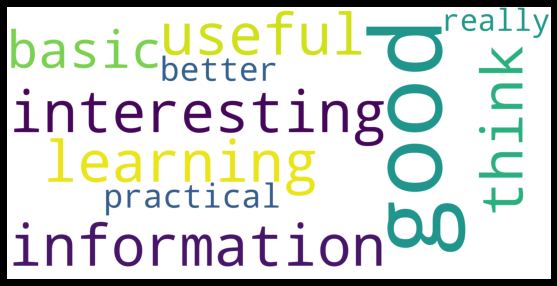

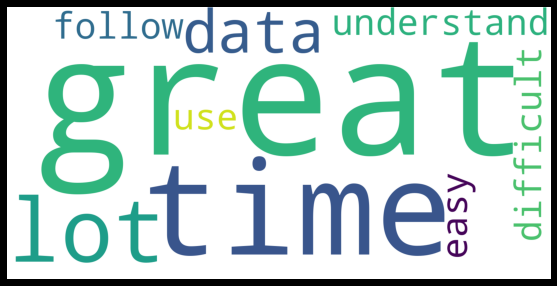

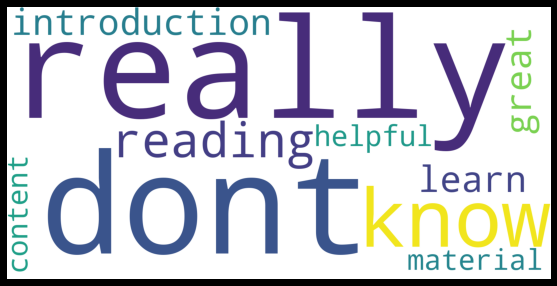

In [ ]:
for arr in clusters:
  wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(arr))
  plt.figure( figsize=(10,5), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")

Find Criticality of reviews in each clusters

In [ ]:
def find_criticality(df):
  critical_values=[]
  for line in df['Review']:
    text =line.split()
    criticality=0
    max_element=0
    for i in text:
      criticality+=counts[i]
      max_element=max(counts[i],max_element)
    if criticality!=0:
      critical_values.append(max_element/criticality)
    else : 
      critical_values.append(0)
  return critical_values

In [ ]:
cluster0=pd.read_csv('/content/drive/MyDrive/bertModel/cluster0.csv')
cluster1=pd.read_csv('/content/drive/MyDrive/bertModel/cluster1.csv')
cluster2=pd.read_csv('/content/drive/MyDrive/bertModel/cluster2.csv')


In [ ]:
cluster0['criticality']=find_criticality(cluster0)
cluster1['criticality']=find_criticality(cluster1)
cluster2['criticality']=find_criticality(cluster2)

In [ ]:
cluster0.drop("Unnamed: 0",axis=1)

,Review,criticality
0,pretty much big eating healthy actually someth...,0.228464
1,three student however show student use various...,0.231156
2,one homework graded properly moreover last mod...,0.416290
3,eager study cant take it review good taken man...,0.400000
4,first chapter pretty good everything else obvi...,0.246649
...,...,...
94,good first look topic develop understanding ac...,0.519774
95,good bit explanation could option skip mathema...,0.232323
96,good interesting thank much giving us possibil...,0.262108
97,instructor quite informed passionate subject l...,0.442308


In [ ]:
cluster1.drop("Unnamed: 0",axis=1)

,Review,criticality
0,sorry unenrolled specialization unfortunately ...,0.180505
1,wasnt educational learn anything everything ba...,0.362205
2,much beginner level old needs update also noth...,0.160279
3,theres something wrong quiz even select correc...,0.210256
4,hard understand sometimes clue bug fix dig ext...,0.292683
...,...,...
211,would math furthermore think discussion bit sh...,0.279817
212,valuable new knowledge clinical although taugh...,0.188525
213,teaching instruction extremely awesome,0.486486
214,method teaching amazing precise,0.514286


In [ ]:
cluster2.drop("Unnamed: 0",axis=1)

,Review,criticality
0,watching many like got find job answer intervi...,0.218855
1,quiz throughout seem studied instead learn any...,0.157534
2,useless spent several days watching reading ge...,0.166667
3,chunk reading verbatim w3schools assignment r ...,0.442177
4,s extremely shallow unengaging poorly riding p...,0.339869
...,...,...
103,bit dont quite line actual sure point review s...,0.216783
104,learning cloud storage identity access managem...,0.439189
105,first two s pretty basic someone really thorou...,0.154394
106,pretty good goes perfect pace problem faced li...,0.327402


In [ ]:
|